#### 1.0 import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

#### 1.1 Loading the Traffic data and Viewing the top 5 of the dataset
This dataset is a collection of numbers of vehicles at four junctions at an hourly frequency. The CSV file provides four features:
   - Date time
   - Junctions
   - Vehicles
   - ID
   
The sensors on each of these junctions were collecting data at different times, hence the traffic data from different time periods. Some of the junctions have provided limited or sparse data.

In [3]:
df =pd.read_csv('../Dataset/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


#### 1.3 Data Exploration
   - Pharsing dates
   - Ploting time series
   - Feature Engineering for EDA

In [7]:
# Pharsing dates
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Dropping the ID column
df = df.drop(['ID'], axis=1)

# Viewing the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


#### 1.4 Exploratory Data Analysis

Text(0.5, 0, 'Date')

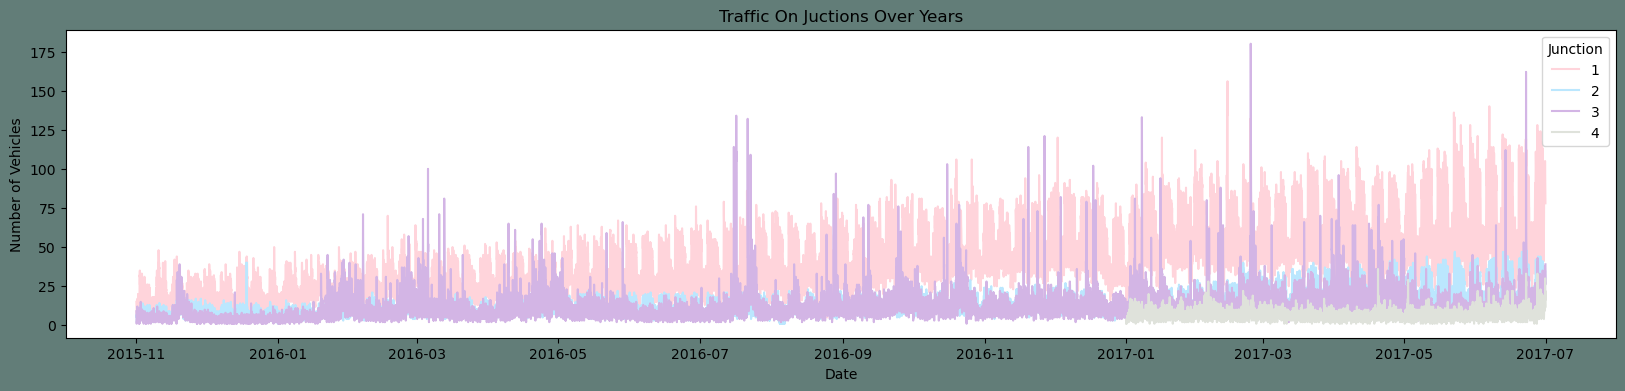

In [13]:
# Passing a list of colors to be used for 
colors = ['#FFD4DB', '#BBE7FE','#D3B5E5','#DFE2DB']
# Ploting the Timeseries
plt.figure(figsize=(20,4) , facecolor='#627D78')
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction", palette=colors)

# labelling the axes
Time_series.set_title("Traffic On Juctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

#### Expected output: Noticeable information in the above plot:
    - It can be seen here that the first junction is visibly having an upward trend.
    - The data for the fourth junction is sparse starting only after 2017
    - Seasonality is not evident from the above plot, So we must explore datetime composition to figure out more about it.

#### 1.5 Feature Engineering
    - Year
    - Month
    - Date in the given month
    - Hour